In [1]:
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyBioInfo.IO.File import GtfFile, GtfTranscriptBuilder, GtfGeneBuilder

In [2]:
f_gtf_ncbi = "../../common/ncbi_Sdu_1.0/GCF_002260705.1_Sdu_1.0_genomic.clean.sorted.gtf.gz"
f_gtf_ensembl = "../../common/ensembl_Sdu_1.0/Seriola_dumerili.Sdu_1.0.103.converted.clean.sorted.gtf.gz"
f_gtf_ngs = "../../1_analysis_of_rna_seq/results/assembly/stringtie/merged_all_samples.sorted.gtf.gz"
f_gtf_tgs = "../../2_analysis_of_iso_seq/results/assembly/tama/filtered_internal_primer/all_samples.mp4.sorted.gtf.gz"
f_gtf_asm = "../../3_integrate_isoforms/results/assembly/asm.sorted.gtf.gz"

# Profiling of isoforms

In [3]:
def load_gtf(path):
    with GtfFile(path) as f:
        records = [x for x in f]
    genes =  list(GtfGeneBuilder(records))
    transcripts = list(GtfTranscriptBuilder(records))
    values1 = [len(g.transcripts) for g in genes] # isoforms per gene
    values2 = [len(t.blocks) for t in transcripts] # exons per isoform
    return values1, values2

data = dict()
data["NCBI"] = load_gtf(f_gtf_ncbi)
data["ENSEMBL"] = load_gtf(f_gtf_ensembl)
data["NGS"] = load_gtf(f_gtf_ngs)
data["TGS"] = load_gtf(f_gtf_tgs)
data["ASM"] = load_gtf(f_gtf_asm)

## Number of isoform per gene (comparison)

barplot

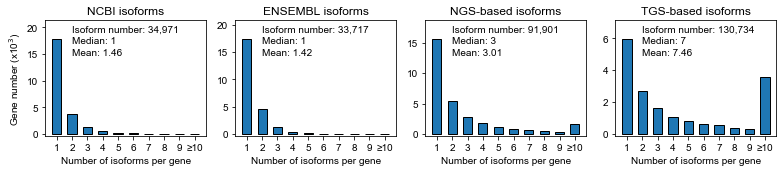

In [122]:
params = [
    [0, 0, "NCBI isoforms", data["NCBI"][0]],
    [0, 1, "ENSEMBL isoforms", data["ENSEMBL"][0]],
    [0, 2, "NGS-based isoforms", data["NGS"][0]],
    [0, 3, "TGS-based isoforms", data["TGS"][0]]
]

fig, axs = plt.subplots(1, 4, figsize=(11, 2.5), sharex=False, sharey=False)

for i, j, title, values in params:
    mean = np.mean(values)
    median = np.mean(values)
    counter = Counter(values)
    vmax = 10
    xs = np.arange(1, vmax + 1)
    ys = np.array([counter[x] for x in xs])
    ys[-1] = sum(counter.values()) - sum(ys[:-1])
    ys = ys / 1000
    ticks = [str(x) for x in xs]
    ticks[-1] = "≥%s" % ticks[-1]
        
    # ax = axs[i][j]
    ax = axs[j]
    plt.sca(ax)
    plt.title(title)
    plt.bar(xs, ys, width=0.6, edgecolor="black", color="C0")
    plt.xticks(xs, ticks)
    plt.xlim(min(xs) - 0.75, max(xs) + 0.75)
    plt.xlabel("Number of isoforms per gene")
    if j == 0:
        plt.ylabel("Gene number (x10$^3$)")
    plt.ylim(-max(ys)* 0.02, max(ys) * 1.2)
    y1, y2 = plt.gca().get_ylim()
    h = y2 - y1
    x = 2
    plt.text(x, y1 + h * 0.9, "Isoform number: %s" % format(sum(values), ","))
    plt.text(x, y1 + h * 0.8, "Median: %d" % median)
    plt.text(x, y1 + h * 0.7, "Mean: %.2f" % mean)
    
plt.tight_layout()
plt.savefig("figures/isoforms_per_gene.comparison.pdf", dpi=300)

## Number of isoform per gene (ASM)

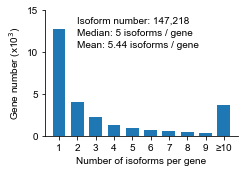

In [4]:
plt.figure(figsize=(3.5, 2.5))

values = data["ASM"][0]
mean = np.mean(values)
median = np.mean(values)
counter = Counter(values)
vmax = 10
xs = np.arange(1, vmax + 1)
ys = np.array([counter[x] for x in xs])
ys[-1] = sum(counter.values()) - sum(ys[:-1])
ys = ys / 1000
ticks = [str(x) for x in xs]
ticks[-1] = "≥%s" % ticks[-1]

# plt.title(title)
plt.bar(xs, ys, width=0.7, edgecolor="none", color="C0")
plt.xticks(xs, ticks)
plt.xlim(min(xs) - 0.75, max(xs) + 0.75)
plt.xlabel("Number of isoforms per gene")
plt.ylabel("Gene number (x10$^3$)")
plt.ylim(0, 15)
plt.yticks([0, 5, 10, 15])
y1, y2 = plt.gca().get_ylim()
h = y2 - y1
x = 2
plt.text(x, y1 + h * 0.9, "Isoform number: %s" % format(sum(values), ","))
plt.text(x, y1 + h * 0.8, "Median: %d isoforms / gene" % median)
plt.text(x, y1 + h * 0.7, "Mean: %.2f isoforms / gene" % mean)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("figures/isoforms_per_gene.asm.pdf", dpi=300)

## Number of exon per isoform (comparison)

barplot

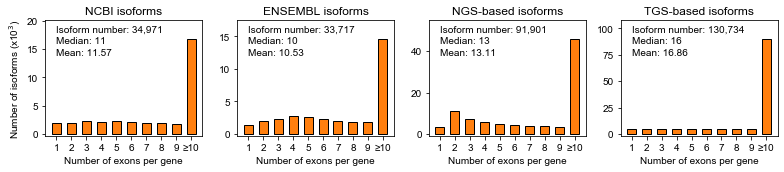

In [125]:
params = [
    [0, 0, "NCBI isoforms", data["NCBI"][1]],
    [0, 1, "ENSEMBL isoforms", data["ENSEMBL"][1]],
    [0, 2, "NGS-based isoforms", data["NGS"][1]],
    [0, 3, "TGS-based isoforms", data["TGS"][1]]
]

fig, axs = plt.subplots(1, 4, figsize=(11, 2.5), sharex=False, sharey=False)

for i, j, title, values in params:
    mean = np.mean(values)
    median = np.mean(values)
    counter = Counter(values)
    vmax = 10
    xs = np.arange(1, vmax + 1)
    ys = np.array([counter[x] for x in xs])
    ys[-1] = sum(counter.values()) - sum(ys[:-1])
    ys = ys / 1000
    ticks = [str(x) for x in xs]
    ticks[-1] = "≥%s" % ticks[-1]
        
    # ax = axs[i][j]
    ax = axs[j]
    plt.sca(ax)
    plt.title(title)
    plt.bar(xs, ys, width=0.6, edgecolor="black", color="C1")
    plt.xticks(xs, ticks)
    plt.xlim(min(xs) - 0.75, max(xs) + 0.75)
    plt.xlabel("Number of exons per gene")
    if j == 0:
        plt.ylabel("Number of isoforms (x10$^3$)")
    plt.ylim(-max(ys)* 0.02, max(ys) * 1.2)
    y1, y2 = plt.gca().get_ylim()
    h = y2 - y1
    x= 1
    plt.text(x, y1 + h * 0.9, "Isoform number: %s" % format(len(values), ","))
    plt.text(x, y1 + h * 0.8, "Median: %d" % median)
    plt.text(x, y1 + h * 0.7, "Mean: %.2f" % mean)
    
plt.tight_layout()
plt.savefig("figures/exons_per_isoform.comparison.pdf", dpi=300)

## Number of exon per isoform (ASM)

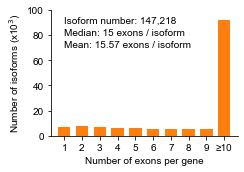

In [5]:
plt.figure(figsize=(3.5, 2.5))

values = data["ASM"][1]
mean = np.mean(values)
median = np.mean(values)
counter = Counter(values)
vmax = 10
xs = np.arange(1, vmax + 1)
ys = np.array([counter[x] for x in xs])
ys[-1] = sum(counter.values()) - sum(ys[:-1])
ys = ys / 1000
ticks = [str(x) for x in xs]
ticks[-1] = "≥%s" % ticks[-1]

plt.bar(xs, ys, width=0.7, edgecolor="none", color="C1")
plt.xticks(xs, ticks)
plt.xlim(min(xs) - 0.75, max(xs) + 0.75)
plt.xlabel("Number of exons per gene")
plt.ylabel("Number of isoforms (x10$^3$)")
plt.ylim(0, 100)
y1, y2 = plt.gca().get_ylim()
h = y2 - y1
x = 1
plt.text(x, y1 + h * 0.9, "Isoform number: %s" % format(len(values), ","))
plt.text(x, y1 + h * 0.8, "Median: %d exons / isoform" % median)
plt.text(x, y1 + h * 0.7, "Mean: %.2f exons / isoform" % mean)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
    
plt.tight_layout()
plt.savefig("figures/exons_per_isoform.asm.pdf", dpi=300)

# SQANTI3 results

In [6]:
def load_sqanti3_classification(path):
    dat = pd.read_csv(path, sep="\t")
    counter = Counter(dat["structural_category"])
    return counter

data = dict()
data["ncbi_vs_ngs"]= load_sqanti3_classification("../../3_integrate_isoforms/results/compare/sqanti3/ncbi_vs_ngs/query_classification.txt")
data["ncbi_vs_tgs"]= load_sqanti3_classification("../../3_integrate_isoforms/results/compare/sqanti3/ncbi_vs_tgs/query_classification.txt")
data["ensembl_vs_ngs"]= load_sqanti3_classification("../../3_integrate_isoforms/results/compare/sqanti3/ensembl_vs_ngs/query_classification.txt")
data["ensembl_vs_tgs"]= load_sqanti3_classification("../../3_integrate_isoforms/results/compare/sqanti3/ensembl_vs_tgs/query_classification.txt")
data["ncbi_vs_asm"] = load_sqanti3_classification("../../3_integrate_isoforms/results/assembly/sqanti3/ncbi_vs_asm/query_classification.txt")

In [7]:
names = ["full-splice_match", 
             "incomplete-splice_match", 
             "novel_in_catalog", 
             "novel_not_in_catalog", 
             "genic", 
             "antisense", 
             "fusion", 
             "intergenic"]
labels = ["FSM", "ISM", "NIC", "NNC", "Genic", "Antisense", "Fusion", "Intergenic"]

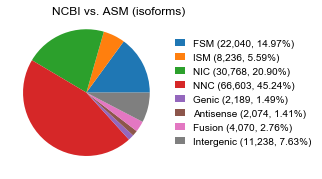

In [10]:
counter = data["ncbi_vs_asm"]
counts = [counter[name] for name in names]
new_labels = []
for k in range(len(labels)):
    new_labels.append("%s (%s, %.2f%%)" % (labels[k], format(counts[k], ","), counts[k] * 100 /sum(counts)))

fig, ax = plt.subplots(figsize=(5.5, 2.5), subplot_kw=dict(aspect="equal"))
plt.suptitle("NCBI vs. ASM (isoforms)")
# plt.figure(figsize=(3.5, 3))
# ax = plt.gca()
wedges, texts, autotexts = ax.pie(counts, autopct=lambda pct: "" % pct, textprops=dict(color="w"))
ax.legend(wedges, new_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/sqanti3_pie.asm.pdf", dpi=300)

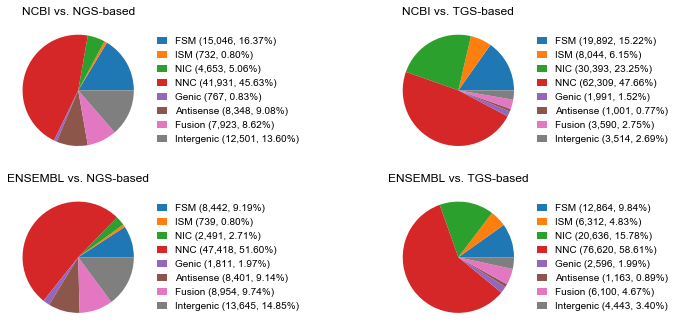

In [10]:
params = [
    [0, 0, "NCBI vs. NGS-based", data["ncbi_vs_ngs"]],
    [0, 2, "NCBI vs. TGS-based", data["ncbi_vs_tgs"]],
    [1, 0, "ENSEMBL vs. NGS-based", data["ensembl_vs_ngs"]],
    [1, 2, "ENSEMBL vs. TGS-based", data["ensembl_vs_tgs"]],
]

fig, axs = plt.subplots(2, 4, figsize=(11, 5), 
                        subplot_kw=dict(aspect="equal"), 
                        gridspec_kw=dict(wspace=0, hspace=0.2, left=0.02, right=0.98, bottom=0.05, top=0.9))

for i, j, title, counter in params:
    ax = axs[i][j]
    plt.sca(ax)
    plt.title(title)
    counts = [counter[name] for name in names]
    
    new_labels = []
    for k in range(len(labels)):
        new_labels.append("%s (%s, %.2f%%)" % (labels[k], format(counts[k], ","), counts[k] * 100 /sum(counts)))
    
    wedges, texts, autotexts = ax.pie(counts, autopct=lambda pct: "" % pct, textprops=dict(color="w"))
    ax.legend(wedges, new_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False, handlelength=1)
    
axs[0][1].set_visible(False)
axs[0][3].set_visible(False)
axs[1][1].set_visible(False)
axs[1][3].set_visible(False)

# plt.tight_layout(rect=(0.02, 0.02, 0.98, 0.98))

plt.savefig("figures/sqanti3_pie.comparison.pdf", dpi=300)